## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Load Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

## EDA

In [3]:
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [4]:
test

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


In [5]:
pd.value_counts(train['letter'])

Z    91
K    90
O    90
L    89
H    89
G    87
M    86
Y    86
U    85
T    82
Q    82
R    81
F    80
X    79
N    77
S    76
D    76
C    74
V    73
A    72
B    71
W    69
J    67
P    66
E    66
I    64
Name: letter, dtype: int64

In [6]:
X_temp = np.array(train[[str(i) for i in range(784)]][:32])
X_temp = X_temp.reshape(-1,1,28,28)
X_temp.shape

(32, 1, 28, 28)

In [7]:
train_digit = train['digit'].values
X_train_letter = train['letter'].values
X_test_letter = test['letter'].values

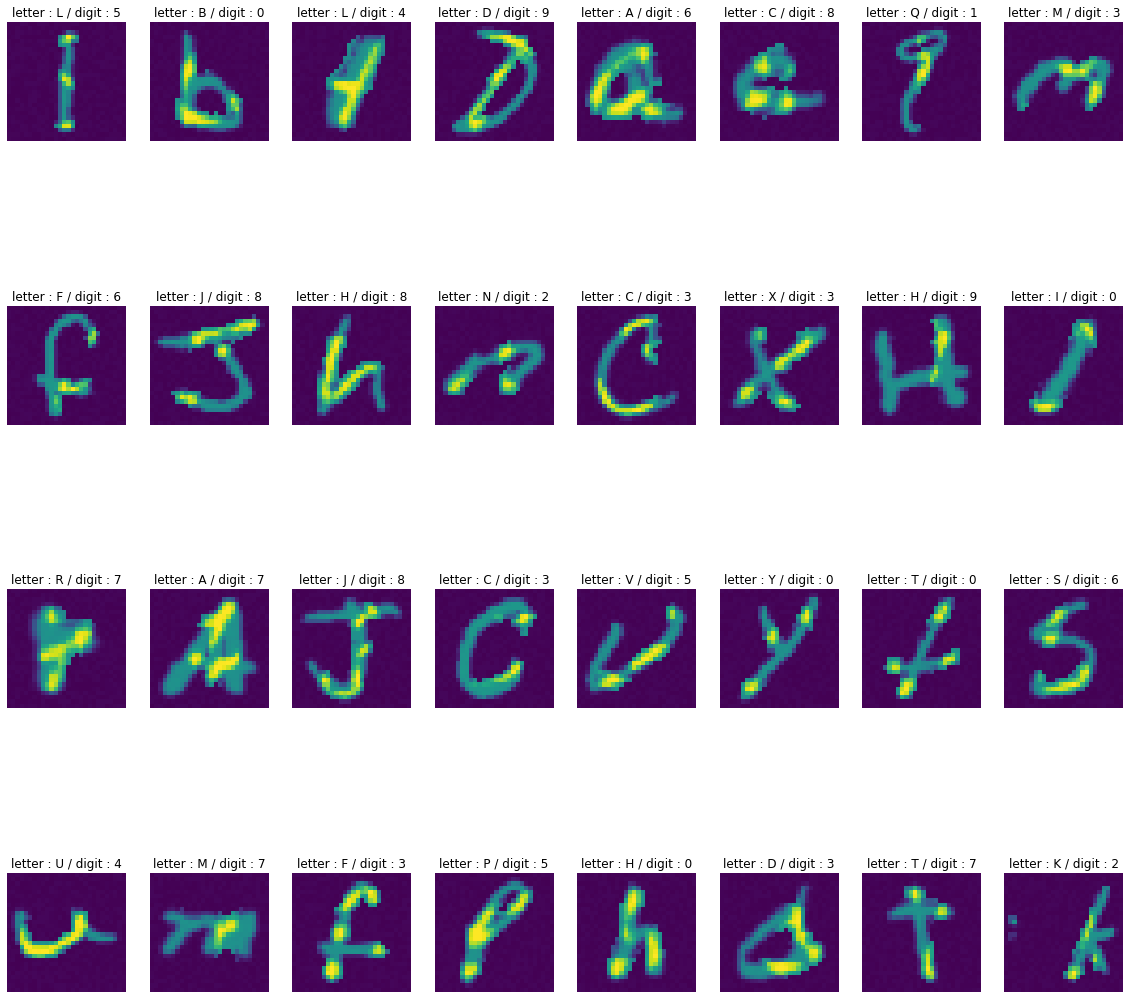

In [8]:
plt.figure(figsize=(20,20))
for idx, (image, digit, letter) in enumerate(zip(X_temp[:32], train_digit[:32] ,X_train_letter[:32])):
    plt.subplot(4,8,idx+1)
    plt.imshow(image[0])
    title = 'letter : {} / digit : {}'.format(letter, digit)
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')

## utility function

### graph

In [9]:
def plot_curve(epochs, hist, list_of_metrics):
    
    fig, ax = plt.subplots(1,2,figsize = (12, 8))
    
    for i in range(len(ax)):
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('Value')
        
        for n in range(len(list_of_metrics)):
            if i == 0:
                y = hist[list_of_metrics[n]]
                if n == 0:
                    ax[i].plot(epochs, y, label="train")
                else:
                    ax[i].plot(epochs, y, label="val")
                ax[i].set_title('Loss')
                ax[i].legend(loc='upper right')
                if n == 1:
                    break
            else:
                if n >= 2:
                    y = hist[list_of_metrics[n]]
                    if n == 2:
                        ax[i].plot(epochs, y, label="train")
                    else:
                        ax[i].plot(epochs, y, label="val")
                    ax[i].set_title('Accuracy')
                    ax[i].legend(loc='lower right')
                    
    plt.show()

### alphabet image

In [10]:
def digit_image(x):
    return np.where(x>=150, x, 0)

### alphabet one-hot encoding

In [11]:
def alpha_one_hot(x):
    label_encoder = LabelEncoder()
    onehot_encoder = OneHotEncoder(sparse=False)
    
    integer_encoded = label_encoder.fit_transform(x)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    
    x = onehot_encoder.fit_transform(integer_encoded)
    return x

## Dataset 

In [12]:
X_train = train.drop(['letter','id','digit'],axis=1)
X_test = test.drop(['letter','id'],axis=1)

In [13]:
X_trains = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [14]:
X_trains.shape

(2048, 28, 28, 1)

In [15]:
X_test.shape

(20480, 28, 28, 1)

In [16]:
y_trains = train['digit']

In [17]:
y_trains = utils.to_categorical(y_trains, 10)

In [18]:
y_trains.shape

(2048, 10)

In [20]:
X_train_digit = digit_image(X_trains)
X_test_digit = digit_image(X_test)

In [21]:
X_trains = np.concatenate((X_trains, X_train_digit),axis=-1)
X_test = np.concatenate((X_test, X_test_digit),axis=-1)

In [22]:
X_trains.shape

(2048, 28, 28, 2)

In [23]:
X_test.shape

(20480, 28, 28, 2)

## Train

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Add, Input, Flatten, Dense, GlobalAveragePooling2D, Dropout, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [25]:
reduction_ratio=16

In [26]:
input_ = tf.keras.layers.Input(shape=(28,28,2))
# digit = tf.keras.layers.Input(shape=(28,28,1)) 
# letter = tf.keras.layers.Input(shape=(26)) 



###########################################################################################
conv1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), kernel_initializer='he_normal', activation='elu', padding='same',
                              kernel_constraint=tf.keras.constraints.max_norm(3.))(input_) #28x28x128


## Residual Unit1
batch1_1 = tf.keras.layers.BatchNormalization()(conv1)
elu1_1 = tf.keras.layers.ELU()(batch1_1)
res1_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_1) 
batch1_2 = tf.keras.layers.BatchNormalization()(res1_1)
elu1_2 = tf.keras.layers.ELU()(batch1_2)
res1_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_2) 
batch1_3 = tf.keras.layers.BatchNormalization()(res1_2)
elu1_3 = tf.keras.layers.ELU()(batch1_3)
res1_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_3)                          

# SEBlock1
ch_input1 = 128
ch_reduced1 = ch_input1//reduction_ratio
avpool1 = tf.keras.layers.GlobalAveragePooling2D()(res1_3)
sed1_1 = tf.keras.layers.Dense(ch_reduced1, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool1)
sed1_2 = tf.keras.layers.Dense(ch_input1, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed1_1)
reshape1 = tf.keras.layers.Reshape((1,1,ch_input1))(sed1_2)
mul1 = tf.keras.layers.Multiply()([res1_3, reshape1])
#

skip1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(conv1)
res1 = tf.keras.layers.Add()([mul1, skip1]) #28x28x128
##

## Residual Unit2
batch2_1 = tf.keras.layers.BatchNormalization()(res1)
elu2_1 = tf.keras.layers.ELU()(batch2_1)
res2_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_1) 
batch2_2 = tf.keras.layers.BatchNormalization()(res2_1)
elu2_2 = tf.keras.layers.ELU()(batch2_2)
res2_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_2) 
batch2_3 = tf.keras.layers.BatchNormalization()(res2_2)
elu2_3 = tf.keras.layers.ELU()(batch2_3)
res2_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_3)                         


# SEBlock2
ch_input2 = 128
ch_reduced2 = ch_input2//reduction_ratio
avpool2 = tf.keras.layers.GlobalAveragePooling2D()(res2_3)
sed2_1 = tf.keras.layers.Dense(ch_reduced2, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool2)
sed2_2 = tf.keras.layers.Dense(ch_input2, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed2_1)
reshape2 = tf.keras.layers.Reshape((1,1,ch_input2))(sed2_2)
mul2 = tf.keras.layers.Multiply()([res2_3, reshape2])
#
skip2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(res1)
res2 = tf.keras.layers.Add()([mul2, skip2])
drop2 = tf.keras.layers.Dropout(0.3)(res2) # 28x28x128
##


## Residual Unit3
batch3_1 = tf.keras.layers.BatchNormalization()(drop2)
elu3_1 = tf.keras.layers.ELU()(batch3_1)
res3_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_1) 
batch3_2 = tf.keras.layers.BatchNormalization()(res3_1)
elu3_2 = tf.keras.layers.ELU()(batch3_2)
res3_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_2) 
batch3_3 = tf.keras.layers.BatchNormalization()(res3_2)
elu3_3 = tf.keras.layers.ELU()(batch3_3)
res3_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_3)                           


# SEBlock3
ch_input3 = 128
ch_reduced3 = ch_input3//reduction_ratio
avpool3 = tf.keras.layers.GlobalAveragePooling2D()(res3_3)
sed3_1 = tf.keras.layers.Dense(ch_reduced3, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool3)
sed3_2 = tf.keras.layers.Dense(ch_input3, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed3_1)
reshape3 = tf.keras.layers.Reshape((1,1,ch_input3))(sed3_2)
mul3 = tf.keras.layers.Multiply()([res3_3, reshape3])
#
skip3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1),padding='same')(drop2)
res3 = tf.keras.layers.Add()([mul3, skip3]) #28x28x128
##


## Residual Unit4
batch4_1 = tf.keras.layers.BatchNormalization()(res3)
elu4_1 = tf.keras.layers.ELU()(batch4_1)
res4_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_1) 
batch4_2 = tf.keras.layers.BatchNormalization()(res4_1)
elu4_2 = tf.keras.layers.ELU()(batch4_2)
res4_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_2) 
batch4_3 = tf.keras.layers.BatchNormalization()(res4_2)
elu4_3 = tf.keras.layers.ELU()(batch4_3)
res4_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_3)                              


# SEBlock4
ch_input4 = 256
ch_reduced4 = ch_input4//reduction_ratio
avpool4 = tf.keras.layers.GlobalAveragePooling2D()(res4_3)
sed4_1 = tf.keras.layers.Dense(ch_reduced4, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool4)
sed4_2 = tf.keras.layers.Dense(ch_input4, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed4_1)
reshape4 = tf.keras.layers.Reshape((1,1,ch_input4))(sed4_2)
mul4 = tf.keras.layers.Multiply()([res4_3, reshape4])
#
skip4 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(res3)
res4 = tf.keras.layers.Add()([mul4, skip4])
pool4 = tf.keras.layers.MaxPool2D((2,2))(res4)
drop4 = tf.keras.layers.Dropout(0.3)(pool4) # 14x14x256
##


## Residual Unit5
batch5_1 = tf.keras.layers.BatchNormalization()(drop4)
elu5_1 = tf.keras.layers.ELU()(batch5_1)
res5_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_1) 
batch5_2 = tf.keras.layers.BatchNormalization()(res5_1)
elu5_2 = tf.keras.layers.ELU()(batch5_2)
res5_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_2) 
batch5_3 = tf.keras.layers.BatchNormalization()(res5_2)
elu5_3 = tf.keras.layers.ELU()(batch5_3)
res5_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_3)                                 


# SEBlock5
ch_input5 = 256
ch_reduced5 = ch_input5//reduction_ratio
avpool5 = tf.keras.layers.GlobalAveragePooling2D()(res5_3)
sed5_1 = tf.keras.layers.Dense(ch_reduced5, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool5)
sed5_2 = tf.keras.layers.Dense(ch_input5, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed5_1)
reshape5 = tf.keras.layers.Reshape((1,1,ch_input5))(sed5_2)
mul5 = tf.keras.layers.Multiply()([res5_3, reshape5])
#
skip5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(drop4)
res5 = tf.keras.layers.Add()([mul5, skip5])
pool5 = tf.keras.layers.MaxPool2D((2,2))(res5) #7x7x256
##


## Residual Unit6
batch6_1 = tf.keras.layers.BatchNormalization()(pool5)
elu6_1 = tf.keras.layers.ELU()(batch6_1)
res6_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_1) 
batch6_2 = tf.keras.layers.BatchNormalization()(res6_1)
elu6_2 = tf.keras.layers.ELU()(batch6_2)
res6_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_2) 
batch6_3 = tf.keras.layers.BatchNormalization()(res6_2)
elu6_3 = tf.keras.layers.ELU()(batch6_3)
res6_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_3)
# SEBlock6
ch_input6 = 256
ch_reduced6 = ch_input6//reduction_ratio
avpool6 = tf.keras.layers.GlobalAveragePooling2D()(res6_3)
sed6_1 = tf.keras.layers.Dense(ch_reduced6, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool6)
sed6_2 = tf.keras.layers.Dense(ch_input6, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed6_1)
reshape6 = tf.keras.layers.Reshape((1,1,ch_input6))(sed6_2)
mul6 = tf.keras.layers.Multiply()([res6_3, reshape6])
#
skip6 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(pool5)
res6 = tf.keras.layers.Add()([mul6, skip6])
drop6 = tf.keras.layers.Dropout(0.3)(res6) # 7x7x256
##

## Residual Unit7
batch7_1 = tf.keras.layers.BatchNormalization()(drop6)
elu7_1 = tf.keras.layers.ELU()(batch7_1)
res7_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_1) 
batch7_2 = tf.keras.layers.BatchNormalization()(res7_1)
elu7_2 = tf.keras.layers.ELU()(batch7_2)
res7_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_2) 
batch7_3 = tf.keras.layers.BatchNormalization()(res7_2)
elu7_3 = tf.keras.layers.ELU()(batch7_3)
res7_3 = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_3)
skip7 = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1),padding='same')(drop6)
res7 = tf.keras.layers.Add()([res7_3, skip7])
pool7 = tf.keras.layers.MaxPool2D((3,3))(res7) # 2x2x512
############################################################################################


# ###########################################################################################
# conv1_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), kernel_initializer='he_normal', activation='elu', padding='same',
#                               kernel_constraint=tf.keras.constraints.max_norm(3.))(digit) #28x28x128


# ## Residual Unit1
# batch1_1_digit = tf.keras.layers.BatchNormalization()(conv1_digit)
# elu1_1_digit = tf.keras.layers.ELU()(batch1_1_digit)
# res1_1_digit = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_1_digit) 
# batch1_2_digit = tf.keras.layers.BatchNormalization()(res1_1_digit)
# elu1_2_digit = tf.keras.layers.ELU()(batch1_2_digit)
# res1_2_digit = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_2_digit) 
# batch1_3_digit = tf.keras.layers.BatchNormalization()(res1_2_digit)
# elu1_3_digit = tf.keras.layers.ELU()(batch1_3_digit)
# res1_3_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_3_digit)                          

# # SEBlock1
# ch_input1_digit = 128
# ch_reduced1_digit = ch_input1_digit//reduction_ratio
# avpool1_digit = tf.keras.layers.GlobalAveragePooling2D()(res1_3_digit)
# sed1_1_digit = tf.keras.layers.Dense(ch_reduced1_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool1_digit)
# sed1_2_digit = tf.keras.layers.Dense(ch_input1_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed1_1_digit)
# reshape1_digit = tf.keras.layers.Reshape((1,1,ch_input1_digit))(sed1_2_digit)
# mul1_digit = tf.keras.layers.Multiply()([res1_3_digit, reshape1_digit])
# #

# skip1_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(conv1_digit)
# res1_digit = tf.keras.layers.Add()([mul1_digit, skip1_digit]) #28x28x128
# ##

# ## Residual Unit2
# batch2_1_digit = tf.keras.layers.BatchNormalization()(res1_digit)
# elu2_1_digit = tf.keras.layers.ELU()(batch2_1_digit)
# res2_1_digit = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_1_digit) 
# batch2_2_digit = tf.keras.layers.BatchNormalization()(res2_1_digit)
# elu2_2_digit = tf.keras.layers.ELU()(batch2_2_digit)
# res2_2_digit = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_2_digit) 
# batch2_3_digit = tf.keras.layers.BatchNormalization()(res2_2_digit)
# elu2_3_digit = tf.keras.layers.ELU()(batch2_3_digit)
# res2_3_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_3_digit)                         


# # SEBlock2
# ch_input2_digit = 128
# ch_reduced2_digit = ch_input2_digit//reduction_ratio
# avpool2_digit = tf.keras.layers.GlobalAveragePooling2D()(res2_3_digit)
# sed2_1_digit = tf.keras.layers.Dense(ch_reduced2_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool2_digit)
# sed2_2_digit = tf.keras.layers.Dense(ch_input2_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed2_1_digit)
# reshape2_digit = tf.keras.layers.Reshape((1,1,ch_input2_digit))(sed2_2_digit)
# mul2_digit = tf.keras.layers.Multiply()([res2_3_digit, reshape2_digit])
# #
# skip2_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(res1_digit)
# res2_digit = tf.keras.layers.Add()([mul2_digit, skip2_digit])
# drop2_digit = tf.keras.layers.Dropout(0.3)(res2_digit) # 28x28x128
# ##


# ## Residual Unit3
# batch3_1_digit = tf.keras.layers.BatchNormalization()(drop2_digit)
# elu3_1_digit = tf.keras.layers.ELU()(batch3_1_digit)
# res3_1_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_1_digit) 
# batch3_2_digit = tf.keras.layers.BatchNormalization()(res3_1_digit)
# elu3_2_digit = tf.keras.layers.ELU()(batch3_2_digit)
# res3_2_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_2_digit) 
# batch3_3_digit = tf.keras.layers.BatchNormalization()(res3_2_digit)
# elu3_3_digit = tf.keras.layers.ELU()(batch3_3_digit)
# res3_3_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_3_digit)                           


# # SEBlock3
# ch_input3_digit = 128
# ch_reduced3_digit = ch_input3_digit//reduction_ratio
# avpool3_digit = tf.keras.layers.GlobalAveragePooling2D()(res3_3_digit)
# sed3_1_digit = tf.keras.layers.Dense(ch_reduced3_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool3_digit)
# sed3_2_digit = tf.keras.layers.Dense(ch_input3_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed3_1_digit)
# reshape3_digit = tf.keras.layers.Reshape((1,1,ch_input3_digit))(sed3_2_digit)
# mul3_digit = tf.keras.layers.Multiply()([res3_3_digit, reshape3_digit])
# #
# skip3_digit = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1),padding='same')(drop2_digit)
# res3_digit = tf.keras.layers.Add()([mul3_digit, skip3_digit]) #28x28x128
# ##


# ## Residual Unit4
# batch4_1_digit = tf.keras.layers.BatchNormalization()(res3_digit)
# elu4_1_digit = tf.keras.layers.ELU()(batch4_1_digit)
# res4_1_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_1_digit) 
# batch4_2_digit = tf.keras.layers.BatchNormalization()(res4_1_digit)
# elu4_2_digit = tf.keras.layers.ELU()(batch4_2_digit)
# res4_2_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_2_digit) 
# batch4_3_digit = tf.keras.layers.BatchNormalization()(res4_2_digit)
# elu4_3_digit = tf.keras.layers.ELU()(batch4_3_digit)
# res4_3_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_3_digit)                              


# # SEBlock4
# ch_input4_digit = 256
# ch_reduced4_digit = ch_input4_digit//reduction_ratio
# avpool4_digit = tf.keras.layers.GlobalAveragePooling2D()(res4_3_digit)
# sed4_1_digit = tf.keras.layers.Dense(ch_reduced4_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool4_digit)
# sed4_2_digit = tf.keras.layers.Dense(ch_input4_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed4_1_digit)
# reshape4_digit = tf.keras.layers.Reshape((1,1,ch_input4_digit))(sed4_2_digit)
# mul4_digit = tf.keras.layers.Multiply()([res4_3_digit, reshape4_digit])
# #
# skip4_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(res3_digit)
# res4_digit = tf.keras.layers.Add()([mul4_digit, skip4_digit])
# pool4_digit = tf.keras.layers.MaxPool2D((2,2))(res4_digit)
# drop4_digit = tf.keras.layers.Dropout(0.3)(pool4_digit) # 14x14x256
# ##


# ## Residual Unit5
# batch5_1_digit = tf.keras.layers.BatchNormalization()(drop4_digit)
# elu5_1_digit = tf.keras.layers.ELU()(batch5_1_digit)
# res5_1_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_1_digit) 
# batch5_2_digit = tf.keras.layers.BatchNormalization()(res5_1_digit)
# elu5_2_digit = tf.keras.layers.ELU()(batch5_2_digit)
# res5_2_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_2_digit) 
# batch5_3_digit = tf.keras.layers.BatchNormalization()(res5_2_digit)
# elu5_3_digit = tf.keras.layers.ELU()(batch5_3_digit)
# res5_3_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_3_digit)                                 


# # SEBlock5
# ch_input5_digit = 256
# ch_reduced5_digit = ch_input5_digit//reduction_ratio
# avpool5_digit = tf.keras.layers.GlobalAveragePooling2D()(res5_3_digit)
# sed5_1_digit = tf.keras.layers.Dense(ch_reduced5_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool5_digit)
# sed5_2_digit = tf.keras.layers.Dense(ch_input5_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed5_1_digit)
# reshape5_digit = tf.keras.layers.Reshape((1,1,ch_input5_digit))(sed5_2_digit)
# mul5_digit = tf.keras.layers.Multiply()([res5_3_digit, reshape5_digit])
# #
# skip5_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(drop4_digit)
# res5_digit = tf.keras.layers.Add()([mul5_digit, skip5_digit])
# pool5_digit = tf.keras.layers.MaxPool2D((2,2))(res5_digit) #7x7x256
# ##


# ## Residual Unit6
# batch6_1_digit = tf.keras.layers.BatchNormalization()(pool5_digit)
# elu6_1_digit = tf.keras.layers.ELU()(batch6_1_digit)
# res6_1_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_1_digit)
# batch6_2_digit = tf.keras.layers.BatchNormalization()(res6_1_digit)
# elu6_2_digit = tf.keras.layers.ELU()(batch6_2_digit)
# res6_2_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_2_digit) 
# batch6_3_digit = tf.keras.layers.BatchNormalization()(res6_2_digit)
# elu6_3_digit = tf.keras.layers.ELU()(batch6_3_digit)
# res6_3_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_3_digit)
# # SEBlock6
# ch_input6_digit = 256
# ch_reduced6_digit = ch_input6_digit//reduction_ratio
# avpool6_digit = tf.keras.layers.GlobalAveragePooling2D()(res6_3_digit)
# sed6_1_digit = tf.keras.layers.Dense(ch_reduced6_digit, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool6_digit)
# sed6_2_digit = tf.keras.layers.Dense(ch_input6_digit, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed6_1_digit)
# reshape6_digit = tf.keras.layers.Reshape((1,1,ch_input6_digit))(sed6_2_digit)
# mul6_digit = tf.keras.layers.Multiply()([res6_3_digit, reshape6_digit])
# #
# skip6_digit = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(pool5_digit)
# res6_digit = tf.keras.layers.Add()([mul6_digit, skip6_digit])
# drop6_digit = tf.keras.layers.Dropout(0.3)(res6_digit) # 7x7x256
# ##

# ## Residual Unit7
# batch7_1_digit = tf.keras.layers.BatchNormalization()(drop6_digit)
# elu7_1_digit = tf.keras.layers.ELU()(batch7_1_digit)
# res7_1_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_1_digit) 
# batch7_2_digit = tf.keras.layers.BatchNormalization()(res7_1_digit)
# elu7_2_digit = tf.keras.layers.ELU()(batch7_2_digit)
# res7_2_digit = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_2_digit) 
# batch7_3_digit = tf.keras.layers.BatchNormalization()(res7_2_digit)
# elu7_3_digit = tf.keras.layers.ELU()(batch7_3_digit)
# res7_3_digit = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_3_digit)
# skip7_digit = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1),padding='same')(drop6_digit)
# res7_digit = tf.keras.layers.Add()([res7_3_digit, skip7_digit])
# pool7_digit = tf.keras.layers.MaxPool2D((3,3))(res7_digit) # 2x2x512
# ############################################################################################





## Classification Unit
flatten1 = tf.keras.layers.Flatten()(pool7)
# flatten2 = tf.keras.layers.Flatten()(pool7_digit)
# flatten3 = tf.keras.layers.Flatten(lettertter)
# gmp1 = tf.keras.layers.GlobalAveragePooling2D()(pool7)
# gmp2 = tf.keras.layers.GlobalAveragePooling2D()(pool7_digit)
# gmp3 = tf.keras.layers.GlobalAveragePooling2D()(letter)
# con = tf.concat([flatten1, flatten2, letter], axis=1)
# con = tf.keras.layers.Concatenate(axis=-1)([flatten1, flatten2, flatten3])
# con = tf.keras.layers.Concatenate(axis=-1)([gmp1, gmp2])
# con_letter = tf.concat([con_image, flatten3], axis=1)

# dense1 = tf.keras.layers.Dense(1024, activation='elu', kernel_initializer='he_normal', kernel_constraint=tf.keras.constraints.max_norm(3.))(con)
# dense1 = tf.keras.layers.Dense(1024, activation='elu', kernel_initializer='he_normal', kernel_constraint=tf.keras.constraints.max_norm(3.))(flatten1)
dense1 = tf.keras.layers.Dense(1024, activation='elu', kernel_initializer='he_normal', kernel_constraint=tf.keras.constraints.max_norm(3.))(flatten1)
# con = tf.keras.layers.Concatenate()([dense1, letter])
drop10 = tf.keras.layers.Dropout(0.5)(dense1)
output = tf.keras.layers.Dense(10 ,activation='softmax')(drop10)
# output = tf.keras.layers.Dense(10 ,activation='softmax')(con)

In [27]:
# cnn_model.summary()

In [28]:
# lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss', factor=0.7, patience=20)

In [29]:
# checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
#         "test_{}.h5".format(num), save_best_only=True, monitor='val_accuracy', mode='auto')

In [30]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 30, restore_best_weights = True)

In [31]:
# model.compile(loss='categorical_crossentropy', optimizer=Adam(
#     lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])

In [32]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_trains)

/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (2048, 28, 28, 2) (2 channels).
  ' channels).')


In [33]:
epochs=500
batch_size = 32
num_model = 10

model_1
-------------------------------------------------------------------------------------------------------------------------
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500


/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1638, 28, 28, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


51/51 [==============================] - 36s 699ms/step - loss: 5.2430 - accuracy: 0.1146 - val_loss: 2.2289 - val_accuracy: 0.2122 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 44ms/step - loss: 2.9204 - accuracy: 0.1376 - val_loss: 2.5815 - val_accuracy: 0.1293 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 47ms/step - loss: 2.8231 - accuracy: 0.1426 - val_loss: 2.1500 - val_accuracy: 0.2293 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 2.7981 - accuracy: 0.1476 - val_loss: 2.6279 - val_accuracy: 0.1902 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 43ms/step - loss: 2.6890 - accuracy: 0.1650 - val_loss: 2.6900 - val_accuracy: 0.1561 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 41ms/step - loss: 2.6362 - accuracy: 0.1644 - val_loss: 2.3526 - val_accuracy: 0.2195 - lr: 0.0010
Epoch 7/500
51/51 [==============================] - 2s 46ms/step - loss: 2.5507

Epoch 54/500
51/51 [==============================] - 2s 44ms/step - loss: 1.5058 - accuracy: 0.4981 - val_loss: 1.1600 - val_accuracy: 0.5951 - lr: 0.0010
Epoch 55/500
51/51 [==============================] - 2s 43ms/step - loss: 1.5357 - accuracy: 0.4907 - val_loss: 1.0879 - val_accuracy: 0.6098 - lr: 0.0010
Epoch 56/500
51/51 [==============================] - 2s 43ms/step - loss: 1.5150 - accuracy: 0.4913 - val_loss: 1.3571 - val_accuracy: 0.5878 - lr: 0.0010
Epoch 57/500
51/51 [==============================] - 2s 43ms/step - loss: 1.4519 - accuracy: 0.5187 - val_loss: 1.0290 - val_accuracy: 0.6634 - lr: 0.0010
Epoch 58/500
51/51 [==============================] - 2s 43ms/step - loss: 1.5093 - accuracy: 0.4950 - val_loss: 1.1498 - val_accuracy: 0.6341 - lr: 0.0010
Epoch 59/500
51/51 [==============================] - 3s 50ms/step - loss: 1.5215 - accuracy: 0.4913 - val_loss: 0.8732 - val_accuracy: 0.7098 - lr: 0.0010
Epoch 60/500
51/51 [==============================] - 2s 44ms/st

51/51 [==============================] - 2s 43ms/step - loss: 1.1642 - accuracy: 0.6320 - val_loss: 0.9248 - val_accuracy: 0.7317 - lr: 0.0010
Epoch 107/500
51/51 [==============================] - 2s 43ms/step - loss: 1.2130 - accuracy: 0.6115 - val_loss: 0.7228 - val_accuracy: 0.7683 - lr: 0.0010
Epoch 108/500
51/51 [==============================] - 2s 42ms/step - loss: 1.2918 - accuracy: 0.5971 - val_loss: 0.9589 - val_accuracy: 0.7341 - lr: 0.0010
Epoch 109/500
51/51 [==============================] - 2s 42ms/step - loss: 1.1928 - accuracy: 0.6164 - val_loss: 0.7810 - val_accuracy: 0.7415 - lr: 0.0010
Epoch 110/500
51/51 [==============================] - 2s 43ms/step - loss: 1.1115 - accuracy: 0.6382 - val_loss: 0.8631 - val_accuracy: 0.7366 - lr: 0.0010
Epoch 111/500
51/51 [==============================] - 2s 43ms/step - loss: 1.1266 - accuracy: 0.6289 - val_loss: 0.7933 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 112/500
51/51 [==============================] - 2s 43ms/step - lo

51/51 [==============================] - 2s 43ms/step - loss: 0.9473 - accuracy: 0.6955 - val_loss: 1.0154 - val_accuracy: 0.7756 - lr: 0.0010
Epoch 159/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9601 - accuracy: 0.7011 - val_loss: 0.6832 - val_accuracy: 0.8024 - lr: 0.0010
Epoch 160/500
51/51 [==============================] - 2s 43ms/step - loss: 0.9285 - accuracy: 0.6968 - val_loss: 0.8969 - val_accuracy: 0.7585 - lr: 0.0010
Epoch 161/500
51/51 [==============================] - 2s 42ms/step - loss: 1.0212 - accuracy: 0.6762 - val_loss: 0.7010 - val_accuracy: 0.7951 - lr: 0.0010
Epoch 162/500
51/51 [==============================] - 2s 42ms/step - loss: 1.0736 - accuracy: 0.6557 - val_loss: 0.7517 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 163/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9612 - accuracy: 0.7142 - val_loss: 0.7522 - val_accuracy: 0.7878 - lr: 0.0010
Epoch 164/500
51/51 [==============================] - 2s 42ms/step - lo

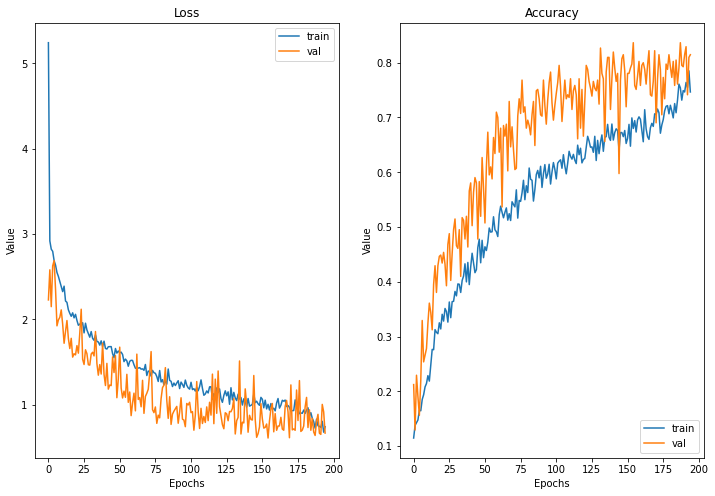

model_2
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500


/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1638, 28, 28, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


51/51 [==============================] - 3s 54ms/step - loss: 1.0857 - accuracy: 0.6685 - val_loss: 0.5091 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 3s 50ms/step - loss: 1.0532 - accuracy: 0.6675 - val_loss: 0.5671 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 1.0505 - accuracy: 0.6526 - val_loss: 0.5130 - val_accuracy: 0.8268 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 45ms/step - loss: 0.9748 - accuracy: 0.6887 - val_loss: 0.6042 - val_accuracy: 0.8171 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 44ms/step - loss: 1.0427 - accuracy: 0.6588 - val_loss: 0.5180 - val_accuracy: 0.8488 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 3s 49ms/step - loss: 1.0517 - accuracy: 0.6768 - val_loss: 0.5096 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 7/500
51/51 [==============================] - 2s 43ms/step - loss: 0.9755 -

51/51 [==============================] - 2s 43ms/step - loss: 0.6557 - accuracy: 0.7904 - val_loss: 0.6887 - val_accuracy: 0.8293 - lr: 7.0000e-04
Epoch 54/500
51/51 [==============================] - 2s 45ms/step - loss: 0.7349 - accuracy: 0.7702 - val_loss: 0.7521 - val_accuracy: 0.8220 - lr: 7.0000e-04
Epoch 55/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7310 - accuracy: 0.7709 - val_loss: 0.5882 - val_accuracy: 0.8610 - lr: 7.0000e-04
Epoch 56/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7317 - accuracy: 0.7696 - val_loss: 0.4855 - val_accuracy: 0.8366 - lr: 7.0000e-04
Epoch 57/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7189 - accuracy: 0.7684 - val_loss: 0.4986 - val_accuracy: 0.8610 - lr: 7.0000e-04
Epoch 58/500
51/51 [==============================] - 2s 43ms/step - loss: 0.6762 - accuracy: 0.7790 - val_loss: 0.5145 - val_accuracy: 0.8512 - lr: 7.0000e-04
Epoch 59/500
51/51 [==============================] -

51/51 [==============================] - 2s 42ms/step - loss: 0.5204 - accuracy: 0.8337 - val_loss: 0.6254 - val_accuracy: 0.8390 - lr: 4.9000e-04
Epoch 105/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5273 - accuracy: 0.8260 - val_loss: 0.4722 - val_accuracy: 0.8585 - lr: 4.9000e-04
Epoch 106/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5208 - accuracy: 0.8207 - val_loss: 0.5483 - val_accuracy: 0.8293 - lr: 4.9000e-04
Epoch 107/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5225 - accuracy: 0.8362 - val_loss: 0.5310 - val_accuracy: 0.8659 - lr: 4.9000e-04
Epoch 108/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5269 - accuracy: 0.8313 - val_loss: 0.4404 - val_accuracy: 0.8610 - lr: 4.9000e-04
Epoch 109/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5617 - accuracy: 0.8163 - val_loss: 0.4946 - val_accuracy: 0.8707 - lr: 4.9000e-04
Epoch 110/500
51/51 [===========================

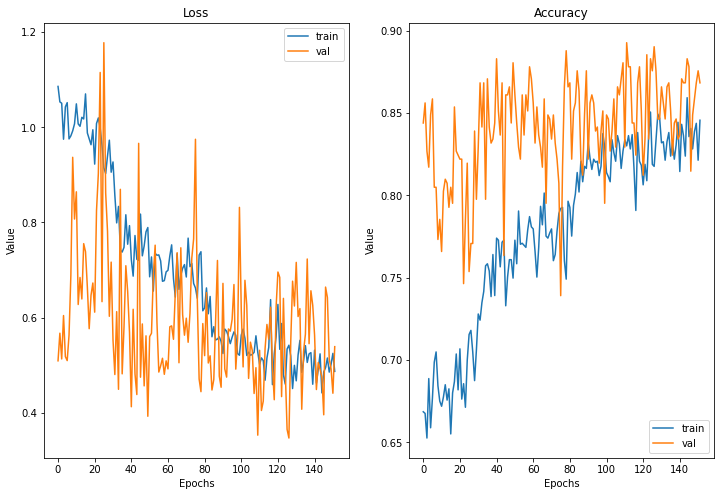

model_3
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500


/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1638, 28, 28, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


51/51 [==============================] - 3s 56ms/step - loss: 0.7851 - accuracy: 0.7555 - val_loss: 0.5773 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 48ms/step - loss: 0.7872 - accuracy: 0.7478 - val_loss: 0.5147 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 43ms/step - loss: 0.8811 - accuracy: 0.7210 - val_loss: 0.6129 - val_accuracy: 0.8317 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 47ms/step - loss: 0.8315 - accuracy: 0.7335 - val_loss: 0.3777 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8148 - accuracy: 0.7484 - val_loss: 0.4700 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 48ms/step - loss: 0.8445 - accuracy: 0.7304 - val_loss: 0.4003 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 7/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9134 -

51/51 [==============================] - 2s 43ms/step - loss: 0.6296 - accuracy: 0.7923 - val_loss: 0.5087 - val_accuracy: 0.8707 - lr: 7.0000e-04


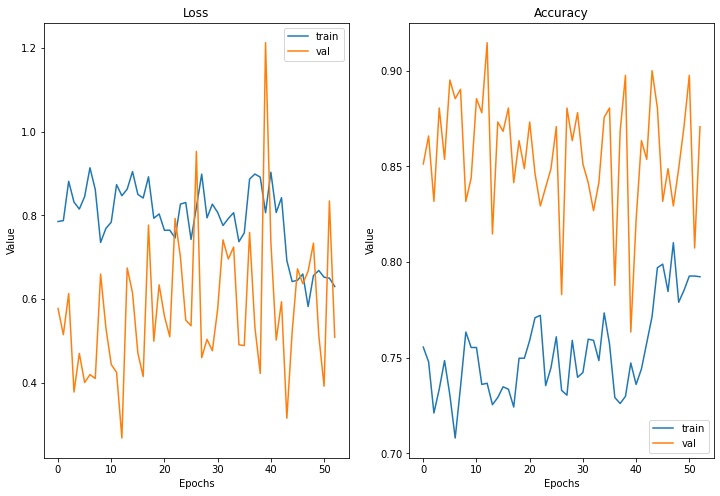

model_4
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500


/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1638, 28, 28, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


51/51 [==============================] - 3s 55ms/step - loss: 0.8961 - accuracy: 0.7292 - val_loss: 0.3399 - val_accuracy: 0.8927 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8485 - accuracy: 0.7360 - val_loss: 0.5041 - val_accuracy: 0.8488 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8850 - accuracy: 0.7329 - val_loss: 0.4341 - val_accuracy: 0.8780 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8476 - accuracy: 0.7428 - val_loss: 0.4478 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8565 - accuracy: 0.7422 - val_loss: 0.5234 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8799 - accuracy: 0.7148 - val_loss: 0.4419 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 7/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9647 -

51/51 [==============================] - 2s 43ms/step - loss: 0.6161 - accuracy: 0.8039 - val_loss: 0.5052 - val_accuracy: 0.8488 - lr: 7.0000e-04
Epoch 54/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6489 - accuracy: 0.7790 - val_loss: 0.3666 - val_accuracy: 0.8878 - lr: 7.0000e-04


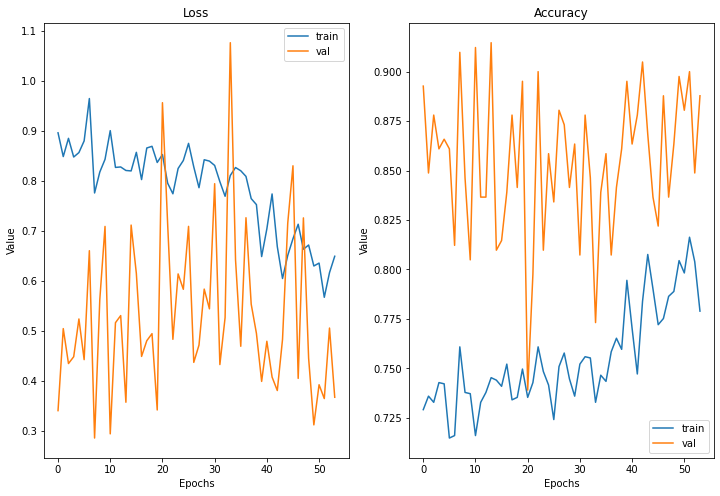

model_5
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500


/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1638, 28, 28, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


51/51 [==============================] - 3s 54ms/step - loss: 0.9140 - accuracy: 0.7267 - val_loss: 0.3656 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8510 - accuracy: 0.7341 - val_loss: 0.5018 - val_accuracy: 0.8707 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 43ms/step - loss: 0.8463 - accuracy: 0.7403 - val_loss: 0.4322 - val_accuracy: 0.8780 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8310 - accuracy: 0.7403 - val_loss: 0.7032 - val_accuracy: 0.8024 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8748 - accuracy: 0.7298 - val_loss: 0.8814 - val_accuracy: 0.8049 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8626 - accuracy: 0.7360 - val_loss: 0.6133 - val_accuracy: 0.8341 - lr: 0.0010
Epoch 7/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7249 -

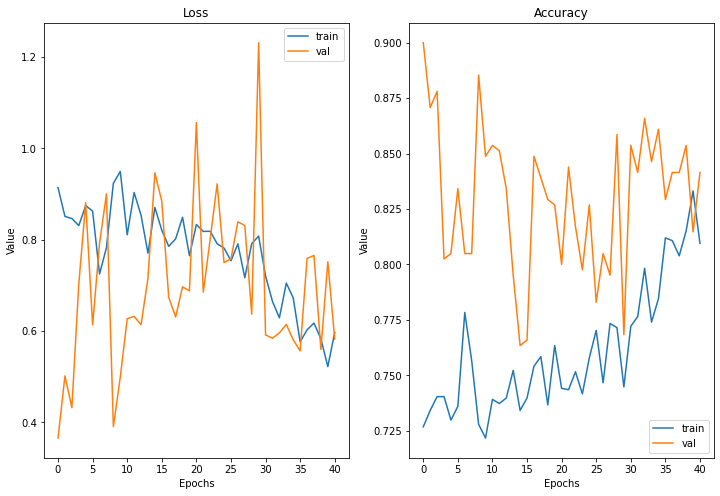

model_6
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500


/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1638, 28, 28, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


51/51 [==============================] - 3s 54ms/step - loss: 0.9208 - accuracy: 0.7157 - val_loss: 0.7095 - val_accuracy: 0.8293 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 47ms/step - loss: 0.9072 - accuracy: 0.7198 - val_loss: 0.3720 - val_accuracy: 0.8634 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8672 - accuracy: 0.7341 - val_loss: 0.4732 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 48ms/step - loss: 0.8174 - accuracy: 0.7422 - val_loss: 0.4243 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8672 - accuracy: 0.7460 - val_loss: 0.6752 - val_accuracy: 0.8195 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 48ms/step - loss: 0.7840 - accuracy: 0.7572 - val_loss: 0.4347 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 7/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8258 -

51/51 [==============================] - 2s 42ms/step - loss: 0.5419 - accuracy: 0.8211 - val_loss: 0.3643 - val_accuracy: 0.8829 - lr: 7.0000e-04
Epoch 54/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5889 - accuracy: 0.8169 - val_loss: 0.3782 - val_accuracy: 0.8756 - lr: 7.0000e-04
Epoch 55/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6179 - accuracy: 0.8001 - val_loss: 0.4321 - val_accuracy: 0.8756 - lr: 7.0000e-04
Epoch 56/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6333 - accuracy: 0.7908 - val_loss: 0.6023 - val_accuracy: 0.8415 - lr: 7.0000e-04
Epoch 57/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5899 - accuracy: 0.8169 - val_loss: 0.6675 - val_accuracy: 0.8171 - lr: 7.0000e-04
Epoch 58/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5720 - accuracy: 0.8188 - val_loss: 0.3351 - val_accuracy: 0.9171 - lr: 7.0000e-04
Epoch 59/500
51/51 [==============================] -

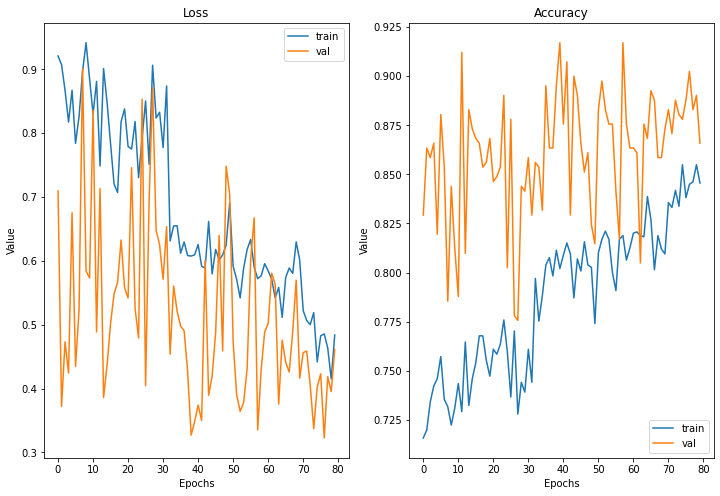

model_7
-------------------------------------------------------------------------------------------------------------------------


/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1638, 28, 28, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/500
51/51 [==============================] - 3s 54ms/step - loss: 0.8141 - accuracy: 0.7500 - val_loss: 0.5131 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8080 - accuracy: 0.7609 - val_loss: 0.4975 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7845 - accuracy: 0.7559 - val_loss: 0.5938 - val_accuracy: 0.8171 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8112 - accuracy: 0.7553 - val_loss: 0.4092 - val_accuracy: 0.8634 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8123 - accuracy: 0.7460 - val_loss: 0.8550 - val_accuracy: 0.7927 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7727 - accuracy: 0.7628 - val_loss: 0.4792 - val_accuracy: 0.8488 - lr: 0.0010
Epoch 7/500
51/51 [==============================] - 2s 48ms/step - lo

51/51 [==============================] - 2s 43ms/step - loss: 0.5139 - accuracy: 0.8309 - val_loss: 0.4014 - val_accuracy: 0.8756 - lr: 7.0000e-04
Epoch 54/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5645 - accuracy: 0.8200 - val_loss: 0.3839 - val_accuracy: 0.8878 - lr: 7.0000e-04
Epoch 55/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5575 - accuracy: 0.8207 - val_loss: 0.4969 - val_accuracy: 0.8829 - lr: 7.0000e-04
Epoch 56/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5423 - accuracy: 0.8269 - val_loss: 0.5773 - val_accuracy: 0.8610 - lr: 7.0000e-04
Epoch 57/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5974 - accuracy: 0.8213 - val_loss: 0.3865 - val_accuracy: 0.8780 - lr: 7.0000e-04
Epoch 58/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5287 - accuracy: 0.8269 - val_loss: 0.5734 - val_accuracy: 0.8537 - lr: 7.0000e-04
Epoch 59/500
51/51 [==============================] -

51/51 [==============================] - 2s 42ms/step - loss: 0.4220 - accuracy: 0.8537 - val_loss: 0.5028 - val_accuracy: 0.8585 - lr: 4.9000e-04
Epoch 105/500
51/51 [==============================] - 2s 43ms/step - loss: 0.4633 - accuracy: 0.8542 - val_loss: 0.6491 - val_accuracy: 0.8341 - lr: 4.9000e-04
Epoch 106/500
51/51 [==============================] - 2s 43ms/step - loss: 0.4189 - accuracy: 0.8599 - val_loss: 0.4178 - val_accuracy: 0.8610 - lr: 3.4300e-04
Epoch 107/500
51/51 [==============================] - 2s 43ms/step - loss: 0.3642 - accuracy: 0.8649 - val_loss: 0.4390 - val_accuracy: 0.8683 - lr: 3.4300e-04
Epoch 108/500
51/51 [==============================] - 2s 42ms/step - loss: 0.3980 - accuracy: 0.8792 - val_loss: 0.4393 - val_accuracy: 0.8683 - lr: 3.4300e-04
Epoch 109/500
51/51 [==============================] - 2s 42ms/step - loss: 0.3625 - accuracy: 0.8761 - val_loss: 0.5401 - val_accuracy: 0.8634 - lr: 3.4300e-04
Epoch 110/500
51/51 [===========================

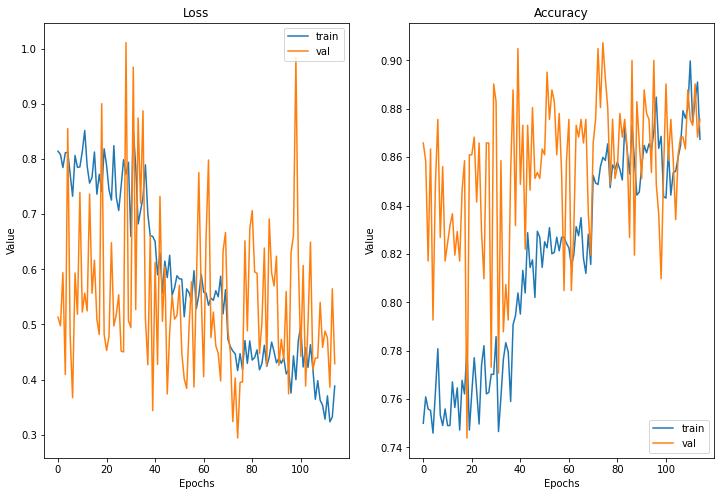

model_8
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500


/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1638, 28, 28, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


51/51 [==============================] - 3s 54ms/step - loss: 0.7617 - accuracy: 0.7819 - val_loss: 0.2582 - val_accuracy: 0.9220 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 43ms/step - loss: 0.6792 - accuracy: 0.7927 - val_loss: 0.2944 - val_accuracy: 0.9098 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7486 - accuracy: 0.7659 - val_loss: 0.3985 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6780 - accuracy: 0.7927 - val_loss: 0.4563 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7467 - accuracy: 0.7721 - val_loss: 0.3400 - val_accuracy: 0.8902 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6744 - accuracy: 0.8076 - val_loss: 0.4168 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 7/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7348 -

Epoch 54/500
51/51 [==============================] - 2s 43ms/step - loss: 0.6693 - accuracy: 0.7964 - val_loss: 0.5340 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 55/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7056 - accuracy: 0.7827 - val_loss: 0.4013 - val_accuracy: 0.8951 - lr: 7.0000e-04
Epoch 56/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5294 - accuracy: 0.8331 - val_loss: 0.5682 - val_accuracy: 0.8829 - lr: 7.0000e-04
Epoch 57/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5889 - accuracy: 0.8157 - val_loss: 0.3855 - val_accuracy: 0.9098 - lr: 7.0000e-04
Epoch 58/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5618 - accuracy: 0.8238 - val_loss: 0.3484 - val_accuracy: 0.8927 - lr: 7.0000e-04
Epoch 59/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5359 - accuracy: 0.8381 - val_loss: 0.4132 - val_accuracy: 0.8854 - lr: 7.0000e-04
Epoch 60/500
51/51 [========================

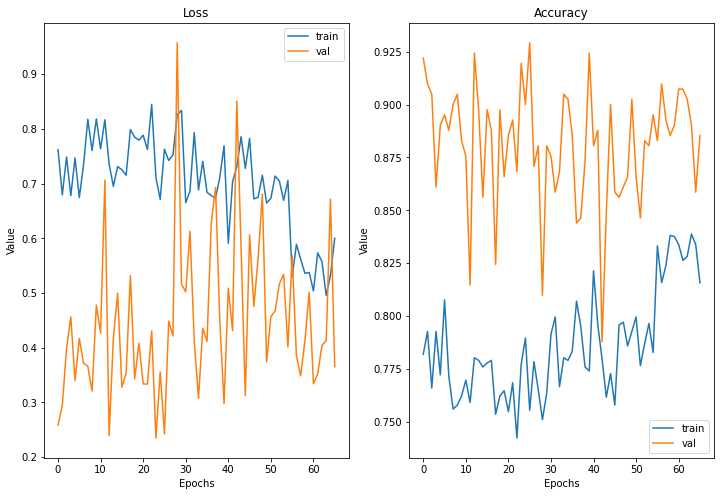

model_9
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500


/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1638, 28, 28, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


51/51 [==============================] - 3s 54ms/step - loss: 0.8350 - accuracy: 0.7567 - val_loss: 0.4107 - val_accuracy: 0.8976 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7873 - accuracy: 0.7653 - val_loss: 0.4658 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 43ms/step - loss: 0.6913 - accuracy: 0.7958 - val_loss: 0.3627 - val_accuracy: 0.8902 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 47ms/step - loss: 0.7239 - accuracy: 0.7883 - val_loss: 0.2087 - val_accuracy: 0.9390 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6925 - accuracy: 0.7839 - val_loss: 0.6441 - val_accuracy: 0.8220 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7427 - accuracy: 0.7702 - val_loss: 0.4419 - val_accuracy: 0.8756 - lr: 0.0010
Epoch 7/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7132 -

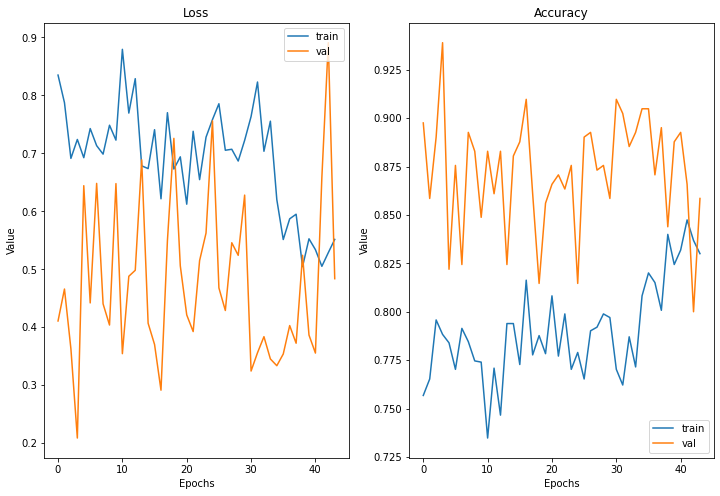

model_10
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500


/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1638, 28, 28, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


51/51 [==============================] - 3s 55ms/step - loss: 0.7503 - accuracy: 0.7812 - val_loss: 0.2204 - val_accuracy: 0.9293 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 45ms/step - loss: 0.7340 - accuracy: 0.7802 - val_loss: 0.7247 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 44ms/step - loss: 0.7260 - accuracy: 0.7846 - val_loss: 0.4322 - val_accuracy: 0.8732 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 43ms/step - loss: 0.8135 - accuracy: 0.7609 - val_loss: 0.5664 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7128 - accuracy: 0.7877 - val_loss: 0.3407 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 43ms/step - loss: 0.6909 - accuracy: 0.7814 - val_loss: 0.3424 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 7/500
51/51 [==============================] - 2s 44ms/step - loss: 0.7733 -

51/51 [==============================] - 2s 43ms/step - loss: 0.5260 - accuracy: 0.8333 - val_loss: 0.5314 - val_accuracy: 0.8878 - lr: 7.0000e-04
Epoch 54/500
51/51 [==============================] - 2s 43ms/step - loss: 0.4847 - accuracy: 0.8481 - val_loss: 0.4230 - val_accuracy: 0.8854 - lr: 7.0000e-04
Epoch 55/500
51/51 [==============================] - 2s 43ms/step - loss: 0.4716 - accuracy: 0.8437 - val_loss: 0.4159 - val_accuracy: 0.9000 - lr: 7.0000e-04
Epoch 56/500
51/51 [==============================] - 2s 42ms/step - loss: 0.4898 - accuracy: 0.8456 - val_loss: 0.3409 - val_accuracy: 0.9073 - lr: 7.0000e-04
Epoch 57/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5292 - accuracy: 0.8294 - val_loss: 0.4000 - val_accuracy: 0.8829 - lr: 7.0000e-04
Epoch 58/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5014 - accuracy: 0.8506 - val_loss: 0.3677 - val_accuracy: 0.9122 - lr: 7.0000e-04
Epoch 59/500
51/51 [==============================] -

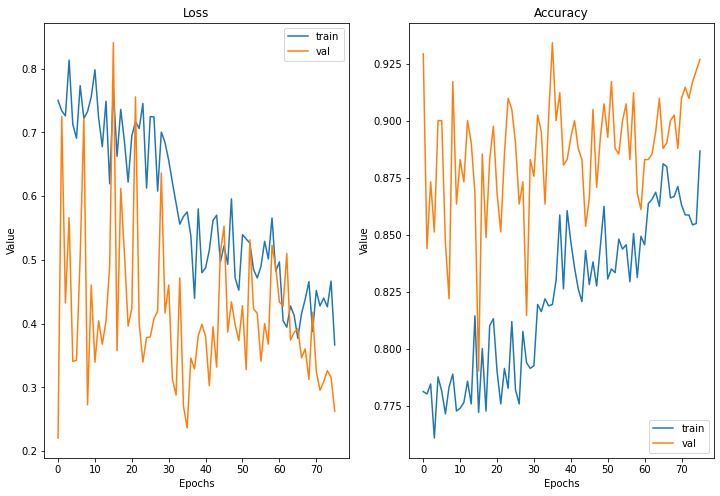

In [34]:
for idx in range(num_model):
    print("model_{}".format(idx+1))
    print("-------------------------------------------------------------------------------------------------------------------------")
    X_train, X_valid, y_train, y_valid = train_test_split(X_trains, y_trains, test_size=0.2, stratify=train['digit'])
    X_train = X_train/255.0
    X_valid = X_valid/255.
    
    model = None
    model = Model(inputs= [input_], outputs=[output])
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(
    lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])
    
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
        "model/channel2_{}.h5".format(idx), save_best_only=True, monitor='val_accuracy', mode='auto')
    
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.7, patience=30)
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 40, restore_best_weights = True)
    
    history = model.fit_generator(datagen.flow(X_train, y_train, shuffle=True, batch_size=batch_size),
                                  epochs=epochs, validation_data=(
                                      X_valid, y_valid),
                                  verbose=1,
                                 steps_per_epoch=X_train.shape[0] // batch_size,
                                  validation_steps=X_valid.shape[0] //batch_size,
                                  callbacks=[checkpoint_cb, early_stopping, lr_scheduler]
                                  )
    plot_curve(history.epoch, history.history, ['loss', 'val_loss', 'accuracy', 'val_accuracy'])

## Predict

In [35]:
X_test = X_test/255.0

In [36]:
best_model_list = []
for i in range(num_model):
    best = tf.keras.models.load_model('model/channel2_{}.h5'.format(i))
    best_model_list.append(best)

In [37]:
result_list = []

for idx, model in enumerate(best_model_list):
    result = model.evaluate(X_valid, y_valid)
    print("model_{}_acc : {}".format(idx+1, result))

13/13 [==============================] - 17s 1s/step - loss: 0.4235 - accuracy: 0.8951
model_1_acc : [0.42348477244377136, 0.8951219320297241]
13/13 [==============================] - 0s 13ms/step - loss: 0.1785 - accuracy: 0.9293
model_2_acc : [0.17845779657363892, 0.9292683005332947]
13/13 [==============================] - 0s 13ms/step - loss: 0.2364 - accuracy: 0.9390
model_3_acc : [0.23642583191394806, 0.9390243887901306]
13/13 [==============================] - 0s 11ms/step - loss: 0.2874 - accuracy: 0.9293
model_4_acc : [0.2873791754245758, 0.9292683005332947]
13/13 [==============================] - 0s 11ms/step - loss: 0.2350 - accuracy: 0.9244
model_5_acc : [0.23497740924358368, 0.9243902564048767]
13/13 [==============================] - 0s 11ms/step - loss: 0.2335 - accuracy: 0.9293
model_6_acc : [0.23351939022541046, 0.9292683005332947]
13/13 [==============================] - 0s 11ms/step - loss: 0.1144 - accuracy: 0.9585
model_7_acc : [0.11441913992166519, 0.958536565303

In [38]:
pred_list = []
for idx, model in enumerate(best_model_list):
    pred = model.predict(X_test)
    pred_list.append(pred)

In [39]:
len(pred_list[0][0])

10

In [40]:
final_pred = np.array([0]*204800).reshape(20480, 10).astype('float64')
for pred in pred_list:
    final_pred += pred
final_pred = np.argmax(final_pred, axis=1)

In [41]:
final_pred

array([6, 9, 8, ..., 6, 8, 0])

In [42]:
submission['digit'] = final_pred

In [43]:
submission

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,8


In [44]:
submission.to_csv('./submission/rexnet_ensemble_channel2_submission.csv', index=False)